In [5]:
import pandas as pd
path="/content/ArabicOffensiveComments.xlsx/ArabicOffensiveComments.xlsx"

In [6]:
df = pd.read_excel(path)
print(df.head())

   Id  Platform                                            Comment  \
0   1   Twitter  @User.IDX في فترة الصغر والمراهقة يكون من الصع...   
1   2  Facebook  "ردا على معظم الردود .. أحب اوضحلكم ان عمليات ...   
2   3   Twitter  @User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل و...   
3   4   YouTube  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...   
4   5   YouTube             على طاري السطحيه مدري ليه تذكرت فيحان    

  Majority_Label  Agreement  NumOfJudgementUsed  Total_Judgement  \
0  Non-Offensive      100.0                   3                3   
1  Non-Offensive      100.0                   3                4   
2  Non-Offensive      100.0                   3                5   
3  Non-Offensive      100.0                   3                3   
4  Non-Offensive      100.0                   3                3   

  Vulgar:V/HateSpeech:HS/None:-  
0                             -  
1                             -  
2                             -  
3                             -  


In [7]:
import re
import numpy as np

In [8]:
# function to clean text

def clean_text(text):

    # matches strings followed by one or more whitespaces

    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # matches all non-arabic characters

    text = re.sub(r'A-Za-z0-9', '', text)

    # matches special characters

    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # matches reduntant whitespaces

    text = re.sub(r'\s+', ' ', text)

    # returns text after removing matches without any leading or trailing whitespaces

    return text.strip()

In [9]:
# apply the function to the text column then saving in a new column

df['Proccessed Text'] = df['Comment'].apply(clean_text)

In [10]:
# display the first 5 rows of the dataframe

print(df['Proccessed Text'].head())

0    في فترة الصغر والمراهقة يكون من الصعب تقبل تعل...
1    ردا على معظم الردود أحب اوضحلكم ان عمليات زرع ...
2    يجب ان تذكروا ان لكل سنة ثيم للحفل وهو نوع من ...
3    بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...
4                على طاري السطحيه مدري ليه تذكرت فيحان
Name: Proccessed Text, dtype: object


In [15]:
!pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.7 MB/s eta 0:00:00


In [17]:
# takes a string as input and returns a list of emojis in the string
# by looping through charcters and checking if they are emojis
# then join extracted emojis into a single string

def extract_emojis(text):
  return ''.join(c for c in text if c in emoji.EMOJI_DATA)

In [18]:
df['Emojis'] = df['Comment'].apply(extract_emojis)

print(df[['Comment', 'Emojis']].head())

                                             Comment Emojis
0  @User.IDX في فترة الصغر والمراهقة يكون من الصع...      😔
1  "ردا على معظم الردود .. أحب اوضحلكم ان عمليات ...       
2  @User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل و...       
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...       
4             على طاري السطحيه مدري ليه تذكرت فيحان        


In [58]:
def find_repeated_words(text):
    return re.findall(r'\b(\w+)\s+\1\b', text)

In [59]:
df['Repeated Words'] = df['Comment'].apply(find_repeated_words)

print(df[['Repeated Words', 'Comment']].head())

  Repeated Words                                            Comment
0             []  @User.IDX في فترة الصغر والمراهقة يكون من الصع...
1             []  "ردا على معظم الردود .. أحب اوضحلكم ان عمليات ...
2             []  @User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل و...
3             []  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...
4             []             على طاري السطحيه مدري ليه تذكرت فيحان 


In [61]:
def detect_feminine_words(text, suffix='ة'):
    return re.findall(rf'\b\w+{suffix}\b', text)

In [62]:
df['Feminine Words'] = df['Comment'].apply(detect_feminine_words)

print(df[['Feminine Words', 'Comment']].head())

                                      Feminine Words  \
0             [فترة, والمراهقة, الثقة, نفسية, شخصية]   
1  [المزروعة, الوراثية, جامعة, الجديدة, وحدة, بال...   
2                                    [سنة, التنكرية]   
3                                [حلقة, صغيرة, بكرة]   
4                                                 []   

                                             Comment  
0  @User.IDX في فترة الصغر والمراهقة يكون من الصع...  
1  "ردا على معظم الردود .. أحب اوضحلكم ان عمليات ...  
2  @User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل و...  
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...  
4             على طاري السطحيه مدري ليه تذكرت فيحان   


In [63]:
def detect_negations(text):
    return re.findall(r'\b(ما \w+ ش|لا \w+)\b', text)

In [64]:
df['Negative Words'] = df['Comment'].apply(detect_negations)

print(df[['Negative Words', 'Comment']].head())

  Negative Words                                            Comment
0             []  @User.IDX في فترة الصغر والمراهقة يكون من الصع...
1       [لا تتم]  "ردا على معظم الردود .. أحب اوضحلكم ان عمليات ...
2             []  @User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل و...
3             []  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...
4             []             على طاري السطحيه مدري ليه تذكرت فيحان 


In [65]:
def detect_questions(text):
    return re.findall(r'\b(لماذا|كيف|ما|أين)\b', text)

In [66]:
df['Question Words'] = df['Comment'].apply(detect_questions)

print(df[['Question Words', 'Comment']].head())

  Question Words                                            Comment
0             []  @User.IDX في فترة الصغر والمراهقة يكون من الصع...
1           [ما]  "ردا على معظم الردود .. أحب اوضحلكم ان عمليات ...
2             []  @User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل و...
3             []  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...
4             []             على طاري السطحيه مدري ليه تذكرت فيحان 


In [67]:
def long_words(text):
    return re.findall(r'\b\w{7,}\b', text)

In [68]:
df['Long Words'] = df['Comment'].apply(long_words)

print(df[['Long Words', 'Comment']].head())

                                          Long Words  \
0           [والمراهقة, تعليقات, الأصدقاء, الوالدين]   
1  [اوضحلكم, المزروعة, الأمراض, الوراثية, استبعاد...   
2                                [الحفلات, التنكرية]   
3                              [ومتضيعليش, اليوتيوب]   
4                                          [السطحيه]   

                                             Comment  
0  @User.IDX في فترة الصغر والمراهقة يكون من الصع...  
1  "ردا على معظم الردود .. أحب اوضحلكم ان عمليات ...  
2  @User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل و...  
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...  
4             على طاري السطحيه مدري ليه تذكرت فيحان   


In [22]:
!pip install pyarabic
import pyarabic.araby as araby

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 4.8 MB/s eta 0:00:00


In [25]:
def normalize_arabic_text(text):

    #Converts all hamza forms to plain alef

    text = araby.normalize_hamza(text)
    text = araby.normalize_alef(text)

    #Fixes combined letter issues

    text = araby.normalize_ligature(text)

    #Deletes elongation characters used in justification

    text = araby.strip_tatweel(text)

    #Strips tashkeel while preserving base letters

    text = araby.strip_tashkeel(text)

    #Number Standardization for consistency

    digit_map = str.maketrans('٠١٢٣٤٥٦٧٨٩', '0123456789')
    text = text.translate(digit_map)

    return text.strip()

In [26]:
df['Normalized Text'] = df['Proccessed Text'].apply(normalize_arabic_text)
print(df[['Normalized Text', 'Proccessed Text']].head())

                                     Normalized Text  \
0  في فترة الصغر والمراهقة يكون من الصعب تقبل تعل...   
1  ردا علا معظم الردود ءحب اوضحلكم ان عمليات زرع ...   
2  يجب ان تذكروا ان لكل سنة ثيم للحفل وهو نوع من ...   
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...   
4              علا طاري السطحيه مدري ليه تذكرت فيحان   

                                     Proccessed Text  
0  في فترة الصغر والمراهقة يكون من الصعب تقبل تعل...  
1  ردا على معظم الردود أحب اوضحلكم ان عمليات زرع ...  
2  يجب ان تذكروا ان لكل سنة ثيم للحفل وهو نوع من ...  
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...  
4              على طاري السطحيه مدري ليه تذكرت فيحان  


In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [43]:
def remove_arabic_stopwords(text):
  stop_words = set(stopwords.words('arabic'))
  return ' '.join([
    word for word in word_tokenize(text)
    if word not in stop_words and len(word) > 1
  ]).strip()

In [44]:
df['Stop-Free Text'] = df['Normalized Text'].apply(remove_arabic_stopwords)
print(df[['Stop-Free Text', 'Normalized Text']].head())

                                      Stop-Free Text  \
0  فترة الصغر والمراهقة يكون الصعب تقبل تعليقات ا...   
1  ردا علا معظم الردود ءحب اوضحلكم ان عمليات زرع ...   
2  يجب ان تذكروا ان لكل سنة ثيم للحفل نوع الحفلات...   
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...   
4              علا طاري السطحيه مدري ليه تذكرت فيحان   

                                     Normalized Text  
0  في فترة الصغر والمراهقة يكون من الصعب تقبل تعل...  
1  ردا علا معظم الردود ءحب اوضحلكم ان عمليات زرع ...  
2  يجب ان تذكروا ان لكل سنة ثيم للحفل وهو نوع من ...  
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...  
4              علا طاري السطحيه مدري ليه تذكرت فيحان  


In [45]:
!pip install tashaphyne
from tashaphyne.stemming import ArabicLightStemmer
ar_stemmer = ArabicLightStemmer()

In [50]:
def stem_text(text):
    stemmer = ArabicLightStemmer()
    stemmed_words = []
    for word in text.split():
        stemmer.light_stem(word)
        stem = stemmer.get_root()
        if stem:
            stemmed_words.append(stem)
    return ' '.join(stemmed_words)

In [51]:
df['Stemmed Text'] = df['Stop-Free Text'].apply(stem_text)
print(df[['Stemmed Text', 'Stop-Free Text']].head())

                                        Stemmed Text  \
0  فتر صغر رهق كون صعب قبل علق ءصدق حول شعر جعد ه...   
1  ردد علل عظم ردد ءحب ضحل ن عمل زرع كلو تمم ولو ...   
2             جبب ن ذكر ن كل سنن ثيم حفل نوع حفل نكر   
3   عمل حلق صغر عشو عند متح بكر ضعلش لوم لهه فخر لتب   
4                        علل طور سطح مدر ليه ذكر فحو   

                                      Stop-Free Text  
0  فترة الصغر والمراهقة يكون الصعب تقبل تعليقات ا...  
1  ردا علا معظم الردود ءحب اوضحلكم ان عمليات زرع ...  
2  يجب ان تذكروا ان لكل سنة ثيم للحفل نوع الحفلات...  
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...  
4              علا طاري السطحيه مدري ليه تذكرت فيحان  


In [ ]:
#pyarabic already imported

In [55]:
def simple_arabic_lemmatize(text):
    lemmas = []
    for word in text.split():

        # Check if word starts with verb prefixes

        if any(word.startswith(prefix) for prefix in ['ي', 'ت', 'ا', 'ن', 'ست']):

            # Basic verb normalization (remove prefixes/suffixes)

            lemma = word[1:] if len(word) > 3 else word
        else:

            # Noun normalization (remove diacritics)

            lemma = araby.strip_tashkeel(word)
        lemmas.append(lemma)

    return ' '.join(lemmas)

In [56]:
df['Lemmatized Text'] = df['Stop-Free Text'].apply(simple_arabic_lemmatize)
print(df[['Lemmatized Text', 'Stop-Free Text']].head())

                                     Lemmatized Text  \
0  فترة لصغر والمراهقة كون لصعب قبل عليقات لءصدقا...   
1  ردا علا معظم لردود ءحب وضحلكم ان عمليات زرع لك...   
2  يجب ان ذكروا ان لكل سنة ثيم للحفل نوع لحفلات ل...   
3  بتعمل حلقة صغيرة عشان عندي متحان بكرة ومتضيعلي...   
4                علا طاري لسطحيه مدري ليه ذكرت فيحان   

                                      Stop-Free Text  
0  فترة الصغر والمراهقة يكون الصعب تقبل تعليقات ا...  
1  ردا علا معظم الردود ءحب اوضحلكم ان عمليات زرع ...  
2  يجب ان تذكروا ان لكل سنة ثيم للحفل نوع الحفلات...  
3  بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعل...  
4              علا طاري السطحيه مدري ليه تذكرت فيحان  


In [77]:
#Count Repeated Words
df['Repeat_Count'] = df['Repeated Words'].apply(len)

#Compare averages
repeat_stats = df.groupby('Majority_Label')['Repeat_Count'].mean()
print(f"Average repeats per comment:\\n{repeat_stats}")

#Most common repeats
all_repeats = [word for sublist in df['Repeated Words'] for word in sublist]
print("Top 5 repeated phrases:", Counter(all_repeats).most_common(5))

Average repeats per comment:\nMajority_Label
Non-Offensive    0.031278
Offensive        0.020741
Name: Repeat_Count, dtype: float64
Top 5 repeated phrases: [('جدا', 12), ('الله', 5), ('م', 5), ('نعم', 3), ('و', 3)]


In [78]:
from scipy.stats import chi2_contingency

In [79]:
#Frequency analysis
df['Feminine_Count'] = df['Feminine Words'].apply(len)
feminine_stats = df.groupby('Majority_Label')['Feminine_Count'].mean()

#Chi-square test
contingency = pd.crosstab(df['Majority_Label'], df['Feminine_Count'] > 0)
chi2, p, _, _ = chi2_contingency(contingency)
print(f"P-value for feminine word association: {p:.4f}")

P-value for feminine word association: 0.1491


In [69]:
!pip install arabic-reshaper python-bidi
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from collections import Counter
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 7.9 MB/s eta 0:00:00


In [74]:
#Emoji Frequency
emoji_counts = df.groupby('Majority_Label')['Emojis'].apply(
    lambda x: Counter([e for lst in x for e in lst if lst])
).unstack(fill_value=0)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

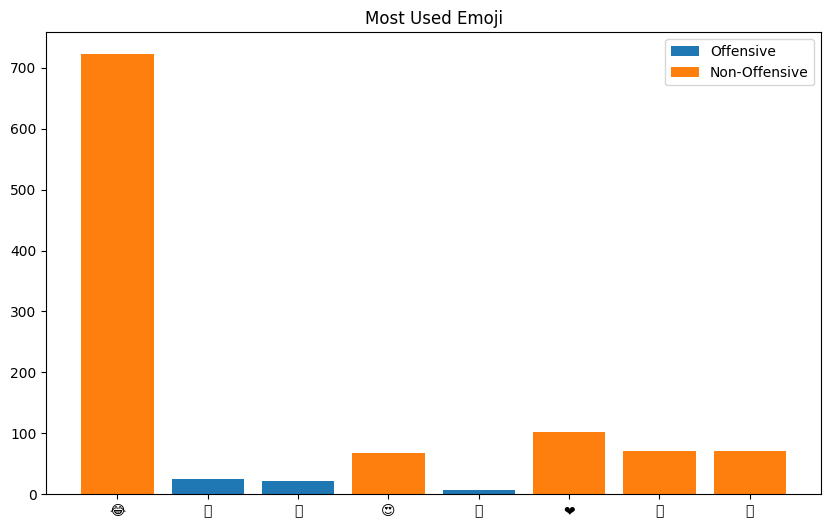

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
for label in ['Offensive', 'Non-Offensive']:
    top_emojis = emoji_counts.loc[label].nlargest(5)
    display_emojis = [get_display(reshape(e)) for e in top_emojis.index]
    ax.bar(display_emojis, top_emojis.values, label=label)

ax.set_title(get_display(reshape('Most Used Emoji')))
ax.legend()
plt.show()

<Axes: title={'center': 'Negation Presence'}, xlabel='Majority_Label'>

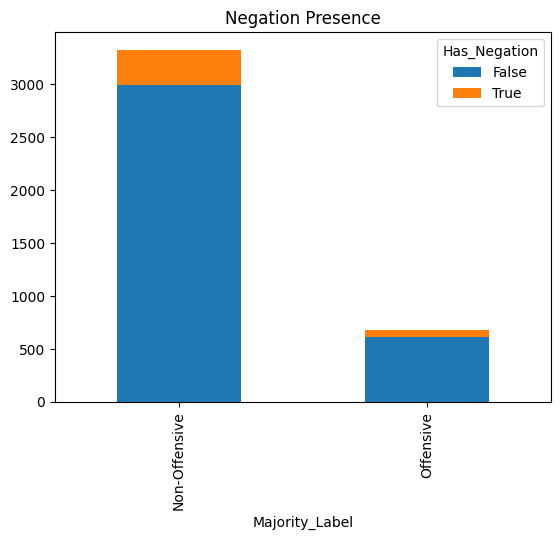

In [80]:
#Negation presence
df['Has_Negation'] = df['Negative Words'].apply(lambda x: len(x) > 0)

#Visualization
negation_dist = df.groupby(['Majority_Label', 'Has_Negation']).size().unstack()
negation_dist.plot(kind='bar', stacked=True,
                   title=get_display(reshape('Negation Presence')))

In [82]:
import seaborn as sns

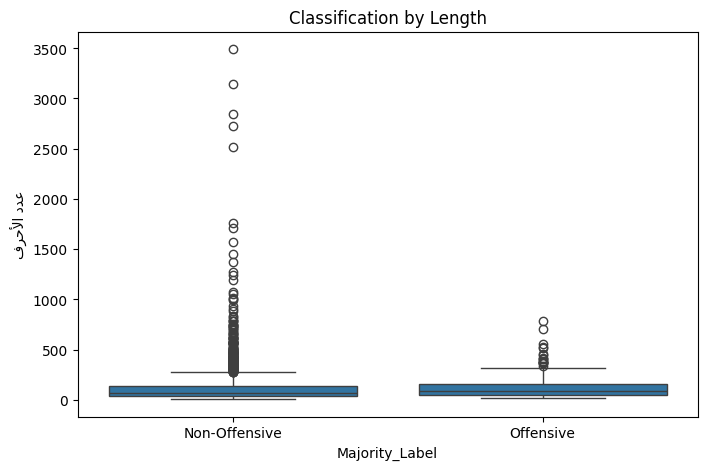

In [84]:
#Calculate lengths
df['Processed_Length'] = df['Proccessed Text'].apply(len)

#Boxplot comparison
plt.figure(figsize=(8,5))
sns.boxplot(x='Majority_Label', y='Processed_Length', data=df)
plt.title(get_display(reshape('Classification by Length')))
plt.ylabel(get_display(reshape('عدد الأحرف')))
plt.show()

In [85]:
#Create pattern flags
pattern_cols = ['Emojis', 'Repeated Words', 'Feminine Words',
               'Negative Words', 'Question Words', 'Long Words']
for col in pattern_cols:
    df[f'has_{col}'] = df[col].apply(lambda x: len(x) > 0)

#Compute correlations
corr_matrix = df[['has_'+c for c in pattern_cols]].corr()

Text(0.5, 1.0, 'Patterns Correlations')

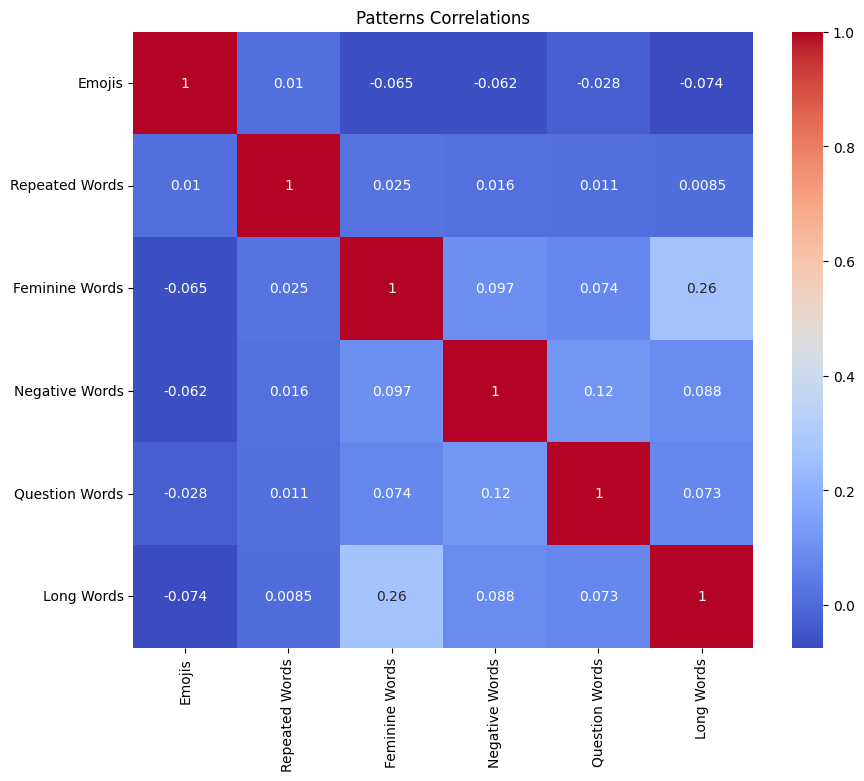

In [87]:
#Visualize
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            xticklabels=[get_display(reshape(c)) for c in pattern_cols],
            yticklabels=[get_display(reshape(c)) for c in pattern_cols])
plt.title(get_display(reshape('Patterns Correlations')))